Example from here https://stackoverflow.com/questions/52690632/analyzing-seasonality-of-google-trend-time-series-using-fft

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, rfftfreq
from scipy.signal import tukey

from numpy.fft import fft, fftshift
import pandas as pd

import io
import requests

In [16]:
gtrend = pd.read_csv('multiTimeline.csv',index_col=0,skiprows=2)
gtrend.head()

,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
Month,,,
2004-01,100,31,48
2004-02,75,26,49
2004-03,67,24,47
2004-04,70,22,48
2004-05,72,22,43


In [17]:
gtrend.index = pd.to_datetime(gtrend.index, format = '%Y-%m')
gtrend.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [23]:
a_gtrend_orig = gtrend["diet: (Worldwide)"]
t_gtrend_orig = np.linspace(0, len(a_gtrend_orig)/12, len(a_gtrend_orig), endpoint = False)


In [24]:
a_gtrend_windowed = (a_gtrend_orig - np.median( a_gtrend_orig )) * tukey( len(a_gtrend_orig) )

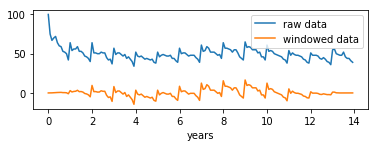

In [26]:
plt.subplot( 2, 1, 1 )
plt.plot( t_gtrend_orig, a_gtrend_orig, label='raw data'  )
plt.plot( t_gtrend_orig, a_gtrend_windowed, label='windowed data' )
plt.xlabel( 'years' )
plt.legend()

In [28]:
a_gtrend_psd = abs(rfft( a_gtrend_orig ))
a_gtrend_psdtukey = abs(rfft( a_gtrend_windowed ) )

# Notice that we assert the delta-time here,
# It would be better to get it from the data.
a_gtrend_freqs = rfftfreq( len(a_gtrend_orig), d = 1./12. )

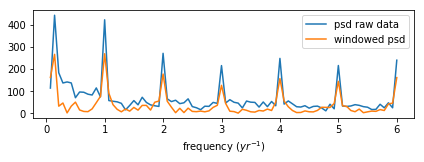

In [29]:
# For the PSD graph, we skip the first two points, this brings us more into a useful scale
# those points represent the baseline (or mean), and are usually not relevant to the analysis
plt.subplot( 2, 1, 2 )
plt.plot( a_gtrend_freqs[1:], a_gtrend_psd[1:], label='psd raw data' )
plt.plot( a_gtrend_freqs[1:], a_gtrend_psdtukey[1:], label='windowed psd' )
plt.xlabel( 'frequency ($yr^{-1}$)' )
plt.legend()

plt.tight_layout()
plt.show()